In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
# saving a copy of the data

data_copy = data.copy()

In [4]:
# lets drop the time column

data.drop('Time', axis=1, inplace=True)

### Data Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

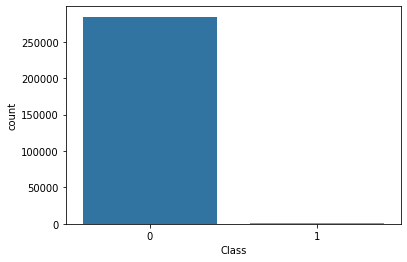

In [6]:
# target class distribution

sns.countplot(data['Class'])

It is a huge imbalance in the target class. we will fix this in the data processing step.

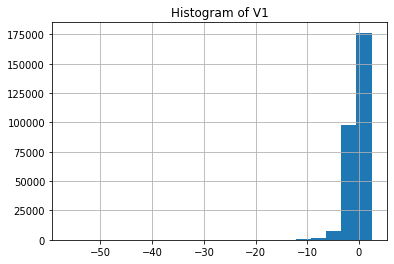

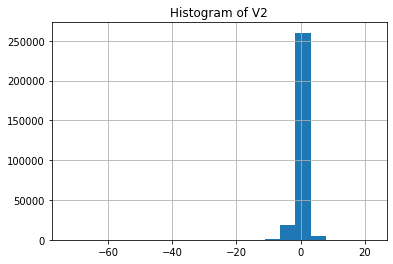

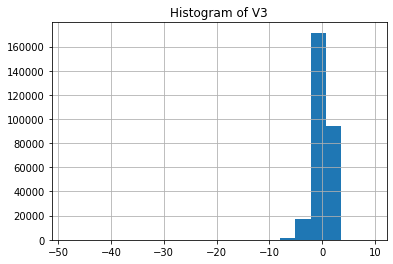

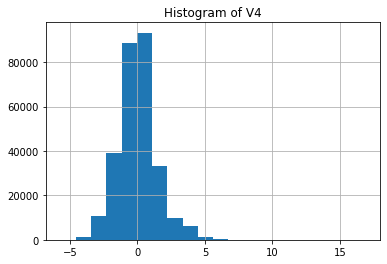

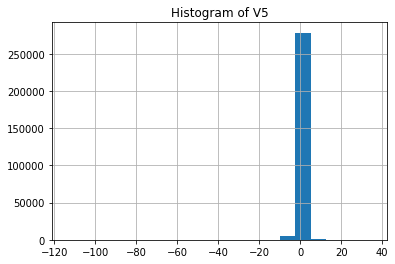

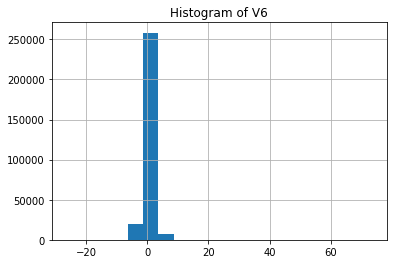

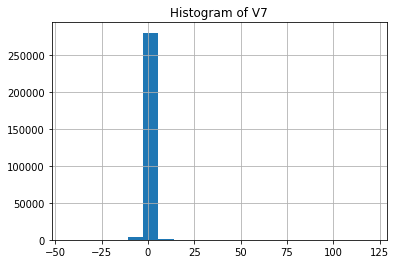

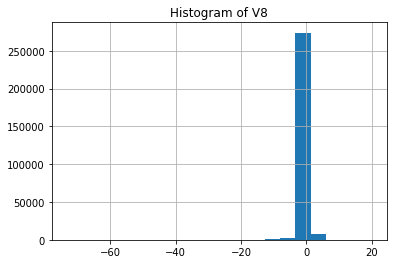

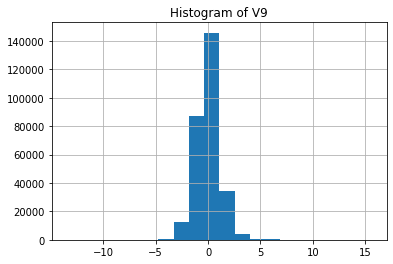

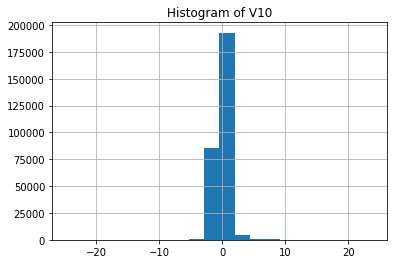

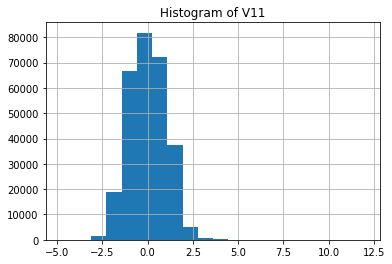

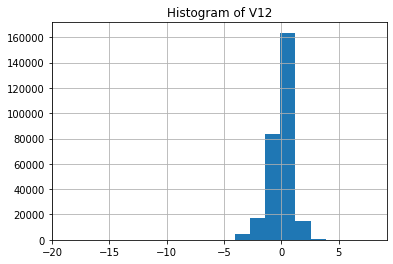

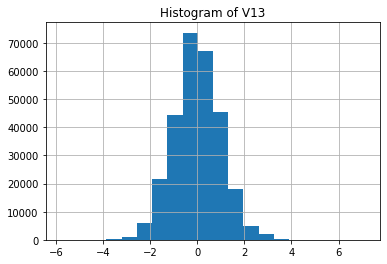

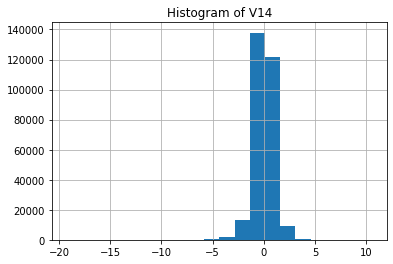

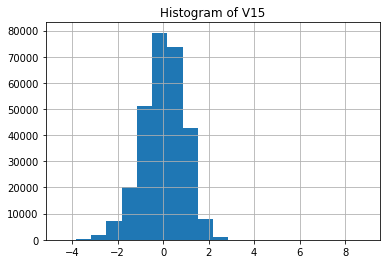

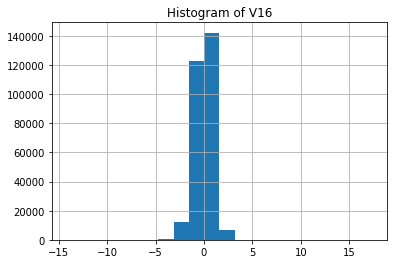

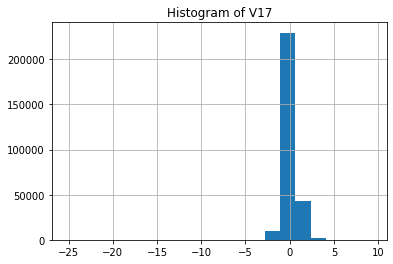

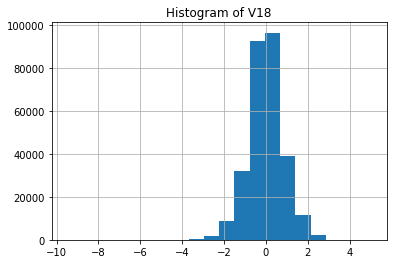

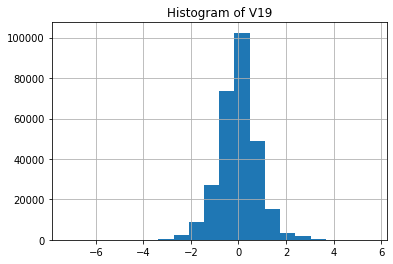

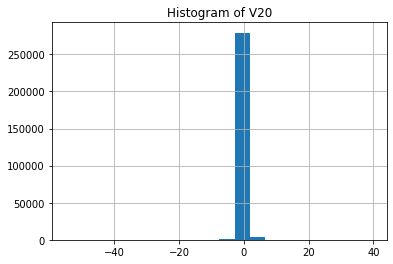

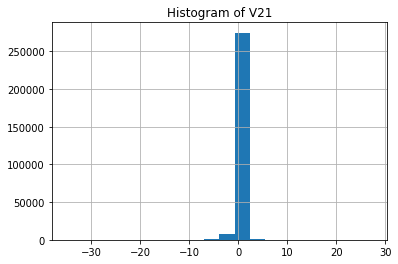

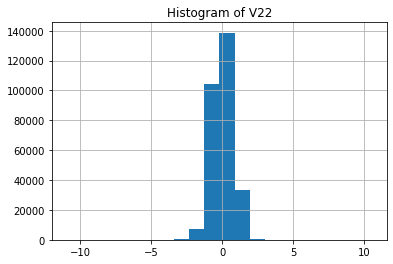

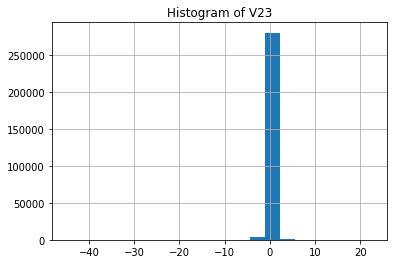

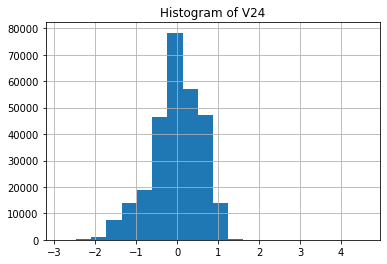

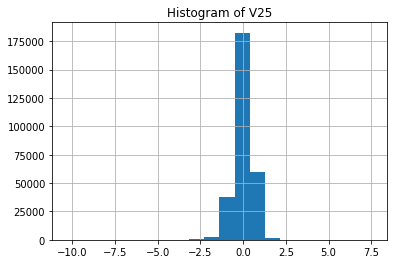

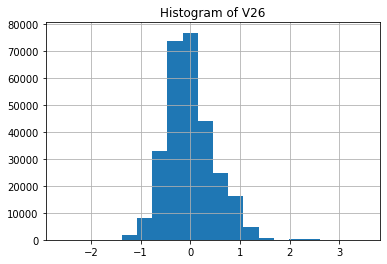

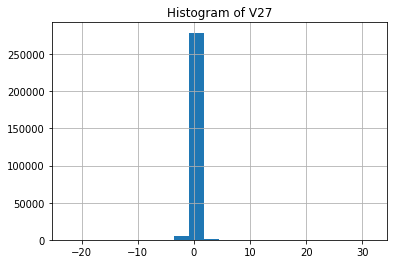

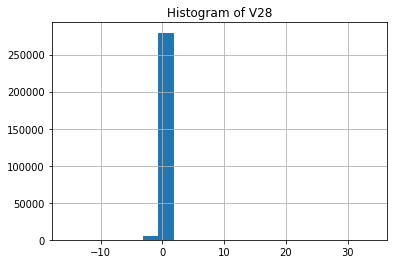

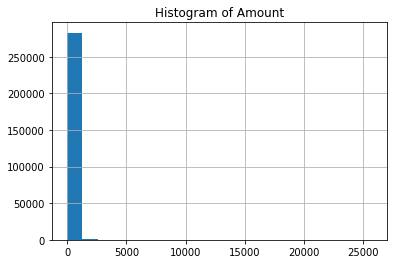

In [7]:
# histogram of all columns

for col in data.columns[:-1]:
    plt.title(f'Histogram of {col}')
    data[col].hist(bins=20)
    plt.show()

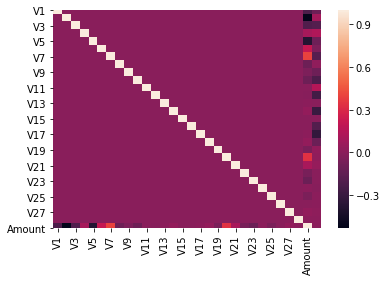

In [8]:
# Correlation matrix of the data

corr = data.corr()
sns.heatmap(corr)
plt.show()

### pre-processing

In [9]:
# lets check for null values

data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# lets scale the 'amount' column as all the columns are scaled

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

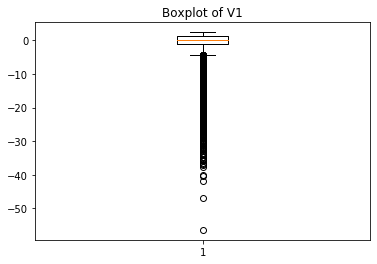

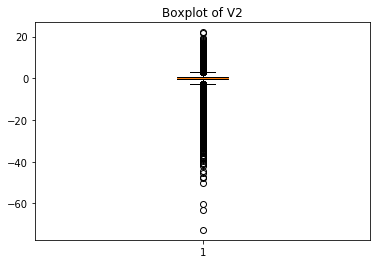

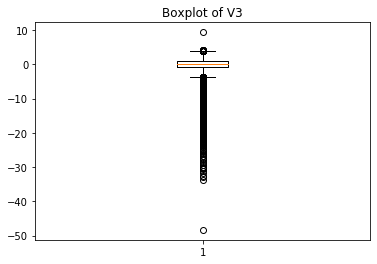

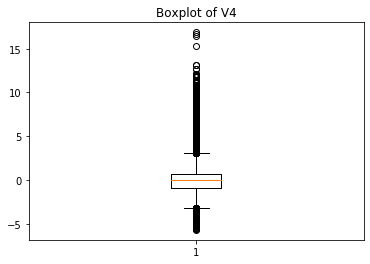

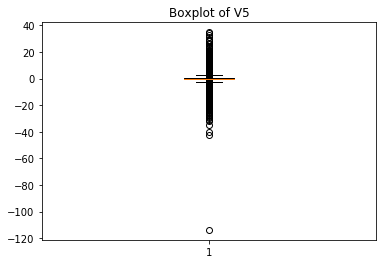

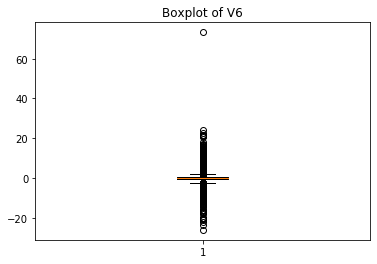

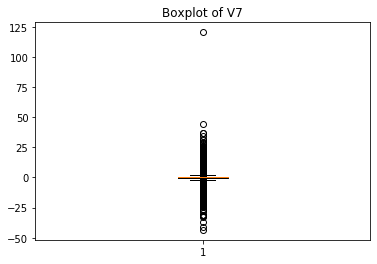

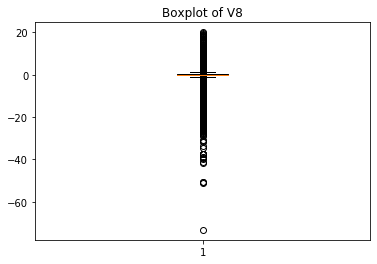

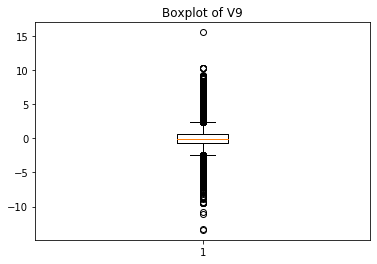

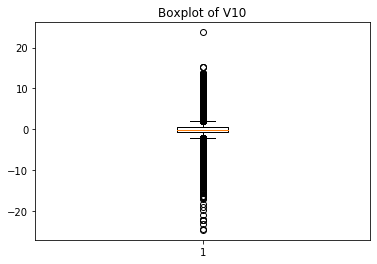

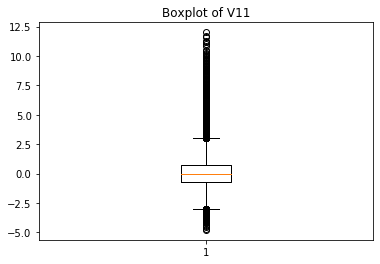

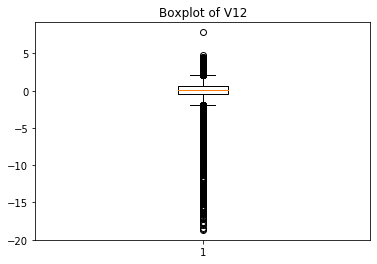

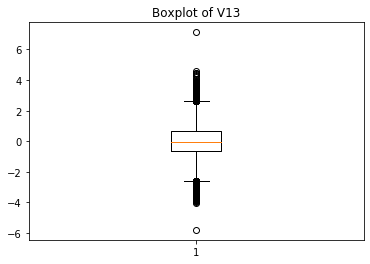

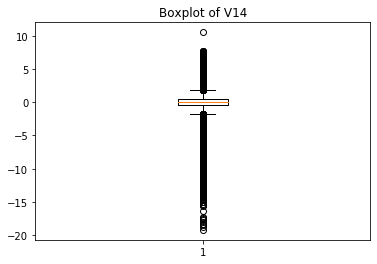

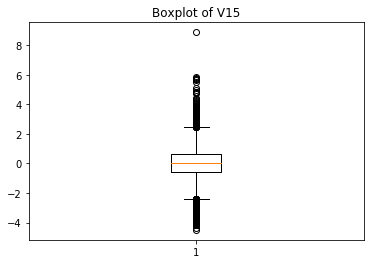

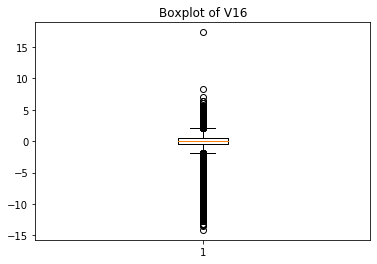

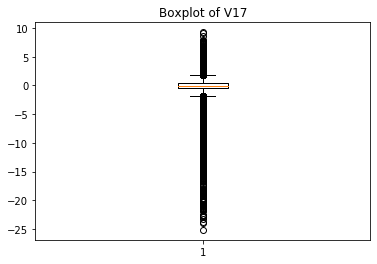

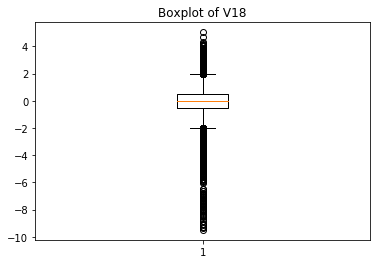

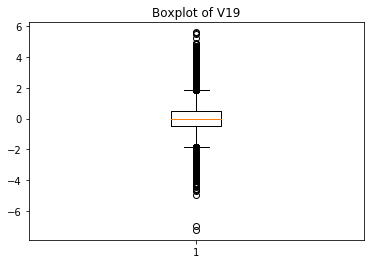

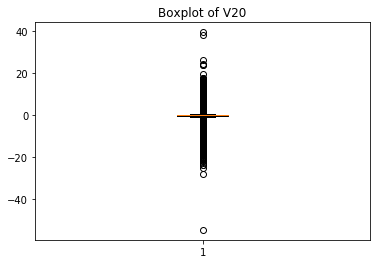

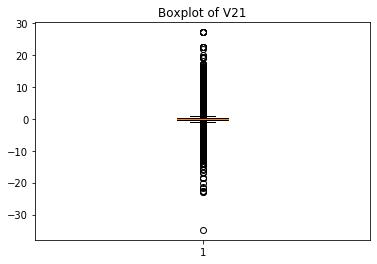

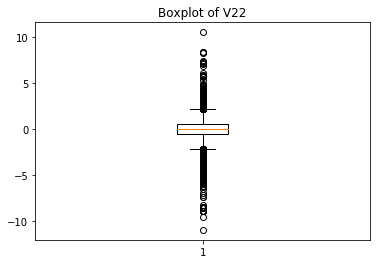

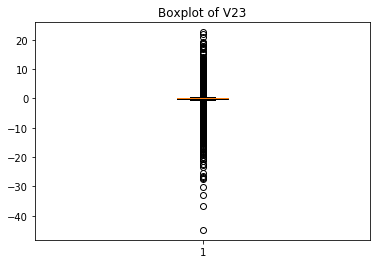

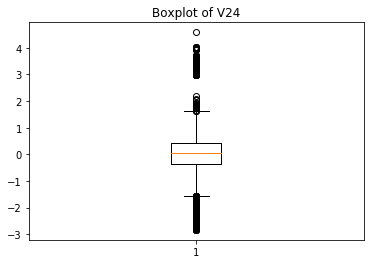

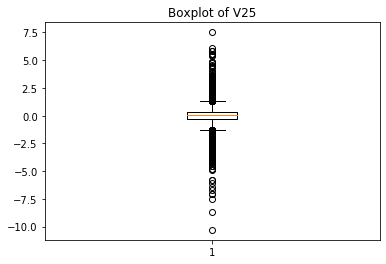

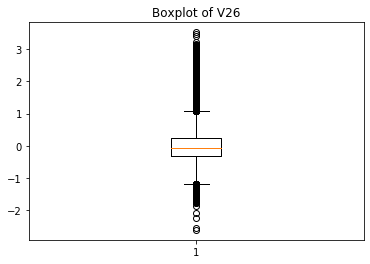

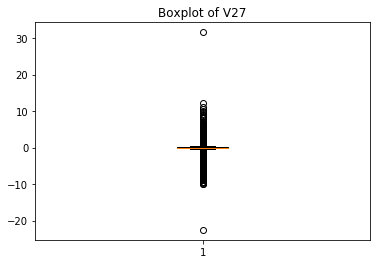

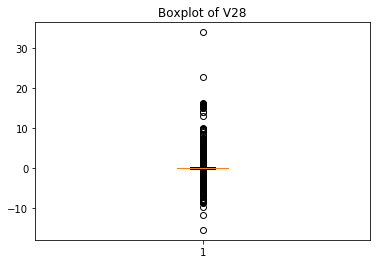

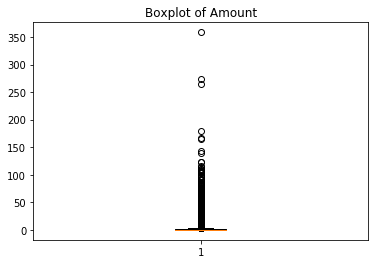

In [11]:
# lets look for outliers

for col in data.columns[:-1]:
    plt.title(f'Boxplot of {col}')
    plt.boxplot(data[col])
    plt.show()

In [12]:
# removing outliers

outliers = data.columns.drop('Class')

def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]
    
    return data_clean

data[outliers] = remove_outliers(data[outliers])

In [13]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
284805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [14]:
# the function has changed all outliers to nan values so lets remove them

data.dropna(inplace=True)

In [15]:
#print('Shape of data with outliers: ', data_copy.shape) #284807
print('Shape of data without outliers: ', data.shape)

Shape of data without outliers:  (146334, 30)


In [16]:
X = data.drop('Class', axis=1)
y = data['Class']

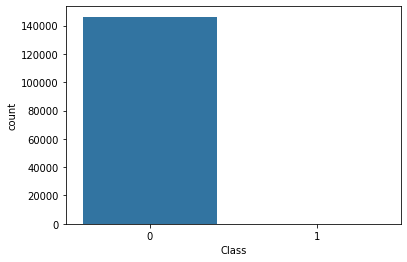

In [17]:
sns.countplot(y)

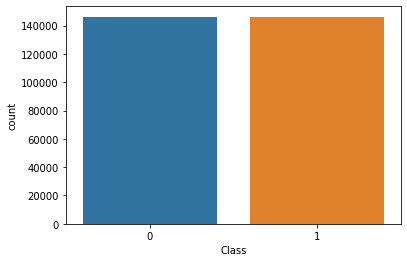

In [18]:
# our target column is heavily imbalanced, lets balance them using smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=56)
X, y = smote.fit_resample(X, y)

sns.countplot(y)

now our target class is balanced

In [19]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [20]:
# Model Building and training

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [21]:
# prediction

pred = model.predict(x_test)
pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

### Precision, Recall, Accuracy and AUC score check

In [22]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, f1_score

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     29370
           1       0.92      0.99      0.96     29158

    accuracy                           0.95     58528
   macro avg       0.96      0.95      0.95     58528
weighted avg       0.96      0.95      0.95     58528



In [23]:
f1_score(y_test, pred)

0.9550803199576915

Text(0.5, 1.0, 'Precision Recall Curve')

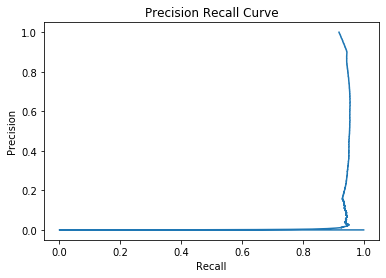

In [24]:
y_pred_prob = model.predict_proba(x_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [25]:
print("AUC score is: ", roc_auc_score(y_test, pred))

AUC score is:  0.9536957405093118
